#### Download  Dataset From Kaggle and Import Libraries

In [1]:
# download gtsrb traffic sign dataset from kaggle
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98%|████████████████████████████████████████ | 597M/612M [00:05<00:00, 167MB/s]
100%|█████████████████████████████████████████| 612M/612M [00:05<00:00, 118MB/s]


In [2]:
# create dataset directory and unzip the downloaded dataset
!mkdir dataset
!unzip -q gtsrb-german-traffic-sign.zip -d /kaggle/working/dataset

In [3]:
# import all neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop,Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization,Input

2024-07-03 14:48:27.225392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 14:48:27.225514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 14:48:27.503556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### Preprocessing Image ####

In [4]:
images = []
labels = []
classes = 43
for i in range(classes):
    path = '/kaggle/working/dataset/train/'+ str(i)
    raw_images = os.listdir(path)
    for img in raw_images:
        try:
            image = Image.open(path + '/'+ img)
            image = image.resize((50,50))
            image = np.array(image)
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

#converting to numpy array
images = np.array(images)
labels = np.array(labels)

In [5]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [6]:
print('Shape of Image Data: ' + str(images.shape))
print('Shape of Label Data: ' + str(labels.shape))

Shape of Image Data: (39209, 50, 50, 3)
Shape of Label Data: (39209,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42, shuffle=True)
print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (29406, 50, 50, 3)
X_valid.shape (9803, 50, 50, 3)
y_train.shape (29406,)
y_valid.shape (9803,)


In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#### Create Model Architecture ####


In [9]:
def create_model():
  model = Sequential([
        Input(shape=(50, 50, 3)),
        Conv2D(filters=16, kernel_size=(8, 8), activation='relu'),
        Conv2D(filters=32, kernel_size=(8, 8), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(axis=-1),
        Dropout(rate=0.5),
        Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
        Conv2D(filters=128, kernel_size=(4, 4), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(axis=-1),
        Dropout(rate=0.5),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(43, activation='softmax')
    ])
  return model

**Creating Model Architecture**

In [10]:
model=create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 43, 43, 16)     │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 36, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 18, 18, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,582,427 (9.85 MB)

 Trainable params: 2,582,107 (9.85 MB)

 Non-trainable params: 320 (1.25 KB)

#### Create Checkpoints
This is helpfull becuase it saves the learning This approach is beneficial because it saves the model's state after each epoch. This proves invaluable if the training process is interrupted for any reason, as it allows you to resume from the last saved checkpoint rather than starting from scratch

In [11]:
import glob
import os
# from google.colab import drive
# # Mount Google Drive
# drive.mount('/content/drive')
# Set the checkpoint directory to a folder in Google Drive
checkpoint_dir = "/kaggle/working/checkpoints"
# Only create the checkpoint directory if it does not exist
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
else:
    print("Checkpoint directory already exists.")
# os.makedirs(checkpoint_dir, exist_ok=True)

In [12]:
def get_latest_checkpoint(name):
    # Pattern to match checkpoint files for the given optimizer name
    checkpoint_files = glob.glob(f'{checkpoint_dir}/{name}_epoch*.weights.h5')
    # If no checkpoint files exist, return None
    if not checkpoint_files:
        return None
    # Find the most recently created checkpoint file
    latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
    return latest_checkpoint

 # Define the checkpoint callback

def save_checkpoint(name):
  print(f"Saving checkpoint for {name} optimizer...")
  checkpoint_callback = ModelCheckpoint(
        filepath=f'{checkpoint_dir}/{name}_epoch{{epoch:02d}}.weights.h5',  # Save each epoch
        save_weights_only=True,
        save_freq='epoch',
        verbose=1
    )
  return checkpoint_callback

In [13]:
# Hyperparameters
epochs=5

#### Part 1 Optimization Algorithms comparision


*   Gradient Descent (GD/Batch GD)
*   Minibatch SGD
*   Stochastic Gradient Descent


In [14]:
# List of optimizers to compare
part1_optimizers = {
    'SGD (Batch GD)': SGD(learning_rate=0.01),
    'SGD (Mini-batch)': SGD(learning_rate=0.01),
    'SGD (Stochastic)': SGD(learning_rate=0.01)
}

In [15]:
# Dictionary to hold accuracy results and histories
part1_accuracy_results = {}
part1_histories = {}

# Train and evaluate the model with each optimizer
for name, optimizer in part1_optimizers.items():
    model = create_model()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Adjust batch size based on optimizer
    if 'Batch GD' in name:
        batch_size = len(x_train)  # Entire dataset
    elif 'Mini-batch' in name:
        batch_size = 32  # Mini-batch size
    else:
        batch_size = 1  # Stochastic (single sample)

    # Load latest checkpoint if it exists
    latest_checkpoint = get_latest_checkpoint(name)
    if latest_checkpoint:
        print(f"Resuming from checkpoint: {latest_checkpoint}")
        model.load_weights(latest_checkpoint)

    print(f"Training with {name} optimizer...")
    # checkpoint callback
    checkpoint_callback = save_checkpoint(name)

    try:
        history = model.fit(
            x_train, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[checkpoint_callback],
            verbose=1
        )
        accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
        part1_accuracy_results[name] = accuracy
        part1_histories[name] = history.history
        print(f"{name} optimizer accuracy: {accuracy}")
    except Exception as e:
        print(f"Training with {name} optimizer failed due to: {e}")

Training with SGD (Batch GD) optimizer...
Saving checkpoint for SGD (Batch GD) optimizer...
Epoch 1/5


2024-07-03 14:49:09.165669: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng18{k2=0,k4=3,k5=1,k6=0,k7=0} for conv (f32[23524,16,43,43]{3,2,1,0}, u8[0]{0}) custom-call(f32[23524,3,50,50]{3,2,1,0}, f32[16,3,8,8]{3,2,1,0}, f32[16]{0}), window={size=8x8}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-03 14:49:09.325294: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.159752537s
Trying algorithm eng18{k2=0,k4=3,k5=1,k6=0,k7=0} for conv (f32[23524,16,43,43]{3,2,1,0}, u8[0]{0}) custom-call(f32[23524,3,50,50]{3,2,1,0}, f32[16,3,8,8]{3,2,1,0}, f32[16]{0}), window={size=8x8}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha"

Training with SGD (Batch GD) optimizer failed due to: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code

  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/k

I0000 00:00:1720018189.112928      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720018189.132736      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4654 - loss: 2.1815

W0000 00:00:1720018197.968948      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018198.796908      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to /kaggle/working/checkpoints/SGD (Mini-batch)_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4657 - loss: 2.1801 - val_accuracy: 0.9102 - val_loss: 0.3065
Epoch 2/5
 20/736 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8920 - loss: 0.3838

W0000 00:00:1720018200.466968      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


730/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9238 - loss: 0.2658
Epoch 2: saving model to /kaggle/working/checkpoints/SGD (Mini-batch)_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9239 - loss: 0.2654 - val_accuracy: 0.9527 - val_loss: 0.1812
Epoch 3/5
728/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9602 - loss: 0.1420
Epoch 3: saving model to /kaggle/working/checkpoints/SGD (Mini-batch)_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9603 - loss: 0.1418 - val_accuracy: 0.9449 - val_loss: 0.1919
Epoch 4/5
734/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9731 - loss: 0.0957
Epoch 4: saving model to /kaggle/working/checkpoints/SGD (Mini-batch)_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9731 - loss: 0.0957 - val_accuracy: 0.9750 - val_loss: 0.0831
Epoch 5/5
735/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9811 - loss: 0.0719
Epoch 5: saving model to /kaggle/working/checkpoints

W0000 00:00:1720018221.058954      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


SGD (Mini-batch) optimizer accuracy: 0.9862287044525146
Training with SGD (Stochastic) optimizer...
Saving checkpoint for SGD (Stochastic) optimizer...
Epoch 1/5
23513/23524 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 1.2714
Epoch 1: saving model to /kaggle/working/checkpoints/SGD (Stochastic)_epoch01.weights.h5
23524/23524 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.7175 - loss: 1.2710 - val_accuracy: 0.8971 - val_loss: 0.4284
Epoch 2/5
23502/23524 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9594 - loss: 0.1382
Epoch 2: saving model to /kaggle/working/checkpoints/SGD (Stochastic)_epoch02.weights.h5
23524/23524 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9594 - loss: 0.1382 - val_accuracy: 0.8800 - val_loss: 0.5026
Epoch 3/5
23524/23524 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.0775
Epoch 3: saving model to /kaggle/working/checkpoints/SGD (Stochastic)_epoch03.weights.h5
23524/23524 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9756 - los

W0000 00:00:1720018527.117165      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


SGD (Stochastic) optimizer accuracy: 0.9301234483718872


W0000 00:00:1720018528.229555      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Comparison of Optimizers:
SGD (Mini-batch): 0.9862287044525146
SGD (Stochastic): 0.9301234483718872

 Part 1 Best optimizer: SGD (Mini-batch) with accuracy: 0.9862287044525146


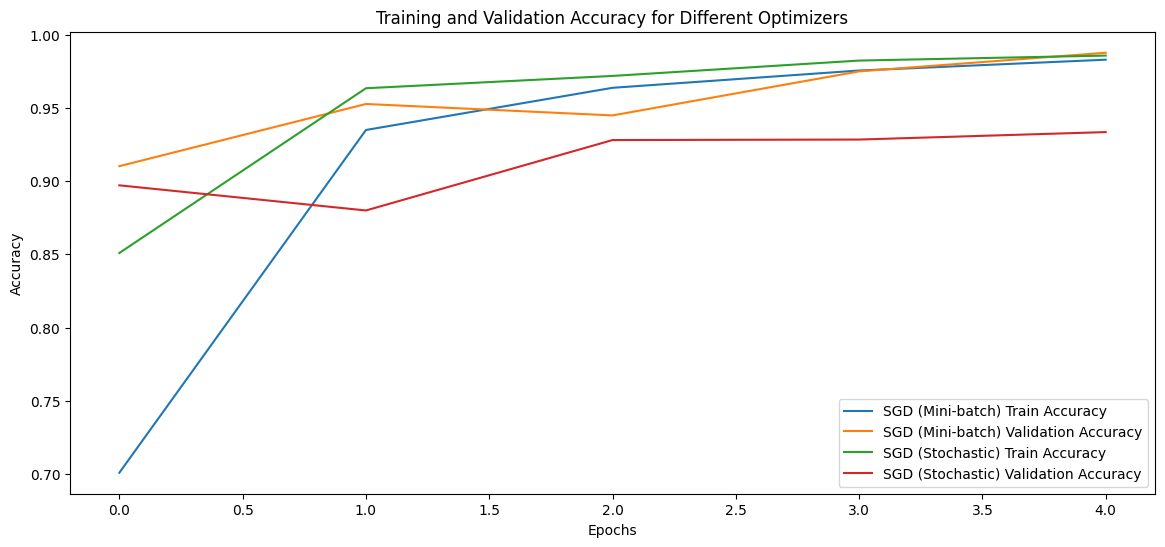

In [16]:
# Print the results
print("\nComparison of Optimizers:")
for name, accuracy in part1_accuracy_results.items():
    print(f"{name}: {accuracy}")

part1_best_optimizer = max(part1_accuracy_results, key=part1_accuracy_results.get)
print(f"\n Part 1 Best optimizer: {part1_best_optimizer} with accuracy: {part1_accuracy_results[part1_best_optimizer]}")

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 6))
for name, history in part1_histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Training and Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Part 2 Optimization Algorithms comparision


* Gradient Descent
* Gradient Descent with Momentum
* Gradient Descent with Nesterov Momentum


In [17]:
part2_optimizers = {
    'Gradient Descent': SGD(learning_rate=0.01),
    'Gradient Descent with Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'Gradient Descent with Nesterov Momentum': SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    }

In [18]:
# Dictionary to hold accuracy results and histories
part2_accuracy_results = {}
part2_histories = {}

# Directory to save checkpoints
checkpoint_dir = "./checkpoints"

# Train and evaluate the model with each optimizer
for name, optimizer in part2_optimizers.items():
    model = create_model()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

     # Load latest checkpoint if it exists
    latest_checkpoint = get_latest_checkpoint(name)
    if latest_checkpoint:
        print(f"Resuming from checkpoint: {latest_checkpoint}")
        model.load_weights(latest_checkpoint)

    print(f"Training with {name} optimizer...")
    # checkpoint callback
    checkpoint_callback = save_checkpoint(name)
    print(f"Training with {name} optimizer...")
    try:
        history = model.fit(
            x_train, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=32,
            callbacks=[checkpoint_callback],
            verbose=1
        )
        accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
        part2_accuracy_results[name] = accuracy
        part2_histories[name] = history.history
        print(f"{name} optimizer accuracy: {accuracy}")
    except Exception as e:
        print(f"Training with {name} optimizer failed due to: {e}")

# Print the results
print("\nComparison of Optimizers:")
for name, accuracy in part2_accuracy_results.items():
    print(f"{name}: {accuracy}")
part2_best_optimizer = max(part2_accuracy_results, key=part2_accuracy_results.get)
print(f"\n Part 1 Best optimizer: {part2_best_optimizer} with accuracy: {part2_accuracy_results[part2_best_optimizer]}")



Training with Gradient Descent optimizer...
Saving checkpoint for Gradient Descent optimizer...
Training with Gradient Descent optimizer...
Epoch 1/5
 20/736 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0361 - loss: 4.7576

W0000 00:00:1720018537.430410      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3788 - loss: 2.5708

W0000 00:00:1720018545.240045      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018545.963287      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./checkpoints/Gradient Descent_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.3791 - loss: 2.5692 - val_accuracy: 0.9303 - val_loss: 0.2663
Epoch 2/5
 19/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8779 - loss: 0.3904

W0000 00:00:1720018546.803130      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


728/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9047 - loss: 0.3286
Epoch 2: saving model to ./checkpoints/Gradient Descent_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9049 - loss: 0.3279 - val_accuracy: 0.9680 - val_loss: 0.1150
Epoch 3/5
732/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9503 - loss: 0.1735
Epoch 3: saving model to ./checkpoints/Gradient Descent_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9503 - loss: 0.1733 - val_accuracy: 0.9821 - val_loss: 0.0750
Epoch 4/5
730/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9685 - loss: 0.1114
Epoch 4: saving model to ./checkpoints/Gradient Descent_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9685 - loss: 0.1113 - val_accuracy: 0.9878 - val_loss: 0.0517
Epoch 5/5
729/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9773 - loss: 0.0780
Epoch 5: saving model to ./checkpoints/Gradient Descent_epoch05.weights.h5
736/736 ━━━━━━━━━━━

W0000 00:00:1720018567.404088      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Gradient Descent optimizer accuracy: 0.9869427680969238
Training with Gradient Descent with Momentum optimizer...
Saving checkpoint for Gradient Descent with Momentum optimizer...
Training with Gradient Descent with Momentum optimizer...
Epoch 1/5
 19/736 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0856 - loss: 4.8499

W0000 00:00:1720018573.569349      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5501 - loss: 2.0435

W0000 00:00:1720018582.031598      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018582.748841      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./checkpoints/Gradient Descent with Momentum_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5504 - loss: 2.0421 - val_accuracy: 0.9653 - val_loss: 0.1295
Epoch 2/5
 17/736 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9363 - loss: 0.1902

W0000 00:00:1720018583.592338      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


728/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9465 - loss: 0.1717
Epoch 2: saving model to ./checkpoints/Gradient Descent with Momentum_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9466 - loss: 0.1714 - val_accuracy: 0.9767 - val_loss: 0.0752
Epoch 3/5
733/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9707 - loss: 0.0911
Epoch 3: saving model to ./checkpoints/Gradient Descent with Momentum_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9708 - loss: 0.0911 - val_accuracy: 0.9879 - val_loss: 0.0516
Epoch 4/5
734/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9859 - loss: 0.0453
Epoch 4: saving model to ./checkpoints/Gradient Descent with Momentum_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9900 - val_loss: 0.0356
Epoch 5/5
728/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9899 - loss: 0.0307
Epoch 5: saving model to ./checkpoints/Gradient Desc

W0000 00:00:1720018604.821441      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Gradient Descent with Momentum optimizer accuracy: 0.9914311766624451
Training with Gradient Descent with Nesterov Momentum optimizer...
Saving checkpoint for Gradient Descent with Nesterov Momentum optimizer...
Training with Gradient Descent with Nesterov Momentum optimizer...
Epoch 1/5
 19/736 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0560 - loss: 5.1565

W0000 00:00:1720018610.890977      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5486 - loss: 1.9818

W0000 00:00:1720018619.372403      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018620.090734      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./checkpoints/Gradient Descent with Nesterov Momentum_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5489 - loss: 1.9803 - val_accuracy: 0.9422 - val_loss: 0.1958
Epoch 2/5
  9/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9105 - loss: 0.2450  

W0000 00:00:1720018620.950340      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9411 - loss: 0.1926
Epoch 2: saving model to ./checkpoints/Gradient Descent with Nesterov Momentum_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9411 - loss: 0.1926 - val_accuracy: 0.9762 - val_loss: 0.0799
Epoch 3/5
731/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9726 - loss: 0.0898
Epoch 3: saving model to ./checkpoints/Gradient Descent with Nesterov Momentum_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9726 - loss: 0.0897 - val_accuracy: 0.9862 - val_loss: 0.0545
Epoch 4/5
732/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9823 - loss: 0.0591
Epoch 4: saving model to ./checkpoints/Gradient Descent with Nesterov Momentum_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9823 - loss: 0.0590 - val_accuracy: 0.9901 - val_loss: 0.0420
Epoch 5/5
733/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9735 - loss: 0.0777
Epoch 5: saving model to 

W0000 00:00:1720018642.244058      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


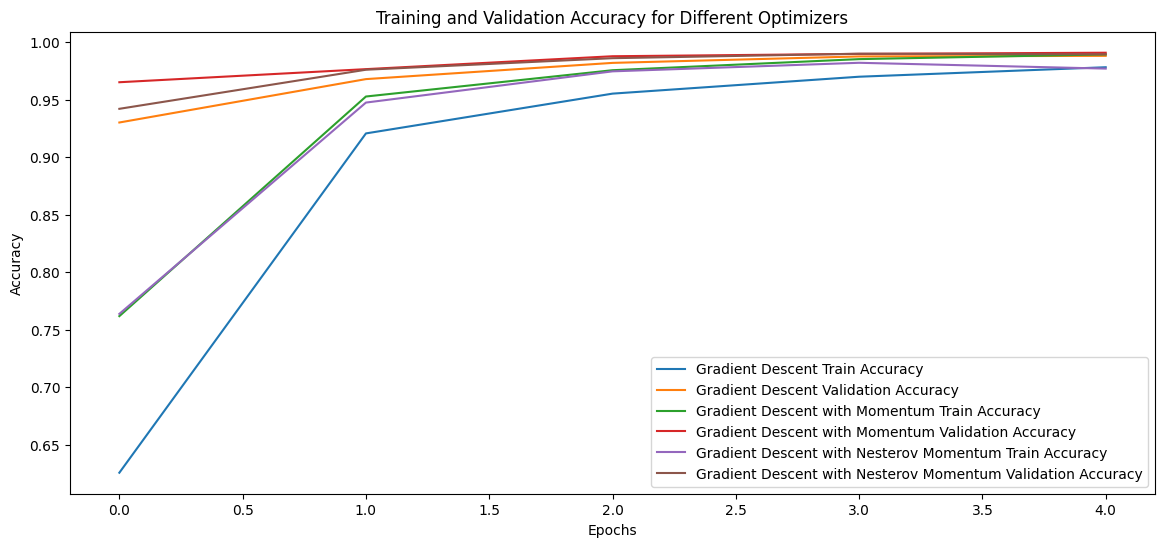

In [19]:
# Plotting the training and validation accuracy
plt.figure(figsize=(14, 6))
for name, history in part2_histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Training and Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Part 3 Optimization Algorithms comparision


*  AdaGrad
*  RMsProp
*  Adam


In [20]:
part3_optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.001)
}

In [21]:
# Dictionary to hold accuracy results and histories
part3_accuracy_results = {}
part3_histories = {}

# Train and evaluate the model with each optimizer
for name, optimizer in part3_optimizers.items():
    model = create_model()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Load latest checkpoint if it exists
    latest_checkpoint = get_latest_checkpoint(name)
    if latest_checkpoint:
        print(f"Resuming from checkpoint: {latest_checkpoint}")
        model.load_weights(latest_checkpoint)

    print(f"Training with {name} optimizer...")
    # checkpoint callback
    checkpoint_callback = save_checkpoint(name)

    print(f"Training with {name} optimizer...")
    try:
        history = model.fit(
            x_train, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=32,
            callbacks=[checkpoint_callback],
            verbose=1
        )

        accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
        part3_accuracy_results[name] = accuracy
        part3_histories[name] = history.history
        print(f"{name} optimizer accuracy: {accuracy}")
    except Exception as e:
        print(f"Training with {name} optimizer failed due to: {e}")

# Print the results
print("\nComparison of Optimizers:")
for name, accuracy in part3_accuracy_results.items():
    print(f"{name}: {accuracy}")

part3_best_optimizer = max(part3_accuracy_results, key=part3_accuracy_results.get)
print(f"\nBest optimizer: {part3_best_optimizer} with accuracy: {part3_accuracy_results[part3_best_optimizer]}")


Training with Adam optimizer...
Saving checkpoint for Adam optimizer...
Training with Adam optimizer...
Epoch 1/5
 17/736 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1393 - loss: 4.6005

W0000 00:00:1720018654.748042      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6592 - loss: 1.4470

W0000 00:00:1720018663.789074      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018664.513110      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./checkpoints/Adam_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6594 - loss: 1.4460 - val_accuracy: 0.9696 - val_loss: 0.1212
Epoch 2/5
  9/736 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9253 - loss: 0.2377  

W0000 00:00:1720018665.359387      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


728/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9357 - loss: 0.2301
Epoch 2: saving model to ./checkpoints/Adam_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9358 - loss: 0.2296 - val_accuracy: 0.9551 - val_loss: 0.1658
Epoch 3/5
733/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9710 - loss: 0.1008
Epoch 3: saving model to ./checkpoints/Adam_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9710 - loss: 0.1008 - val_accuracy: 0.9781 - val_loss: 0.0886
Epoch 4/5
729/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 0.1261
Epoch 4: saving model to ./checkpoints/Adam_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9691 - loss: 0.1260 - val_accuracy: 0.9883 - val_loss: 0.0569
Epoch 5/5
729/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9817 - loss: 0.0653
Epoch 5: saving model to ./checkpoints/Adam_epoch05.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9817 - loss:

W0000 00:00:1720018687.566523      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Adam optimizer accuracy: 0.9905130863189697
Training with Adagrad optimizer...
Saving checkpoint for Adagrad optimizer...
Training with Adagrad optimizer...
Epoch 1/5
 19/736 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0526 - loss: 5.0087

W0000 00:00:1720018693.405365      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5281 - loss: 2.0232

W0000 00:00:1720018701.680307      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018702.443147      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./checkpoints/Adagrad_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.5284 - loss: 2.0217 - val_accuracy: 0.9600 - val_loss: 0.1430
Epoch 2/5
  9/736 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9297 - loss: 0.2599  

W0000 00:00:1720018703.305490      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


730/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9424 - loss: 0.1985
Epoch 2: saving model to ./checkpoints/Adagrad_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9425 - loss: 0.1982 - val_accuracy: 0.9464 - val_loss: 0.1821
Epoch 3/5
730/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9656 - loss: 0.1112
Epoch 3: saving model to ./checkpoints/Adagrad_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9657 - loss: 0.1111 - val_accuracy: 0.9895 - val_loss: 0.0434
Epoch 4/5
730/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0622
Epoch 4: saving model to ./checkpoints/Adagrad_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9809 - loss: 0.0622 - val_accuracy: 0.9895 - val_loss: 0.0419
Epoch 5/5
734/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9858 - loss: 0.0507
Epoch 5: saving model to ./checkpoints/Adagrad_epoch05.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.

W0000 00:00:1720018724.647628      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Adagrad optimizer accuracy: 0.9816382527351379
Training with RMSprop optimizer...
Saving checkpoint for RMSprop optimizer...
Training with RMSprop optimizer...
Epoch 1/5
 19/736 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0641 - loss: 8.3878

W0000 00:00:1720018730.780089      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6465 - loss: 1.7624

W0000 00:00:1720018739.379093      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720018740.113898      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./checkpoints/RMSprop_epoch01.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.6468 - loss: 1.7610 - val_accuracy: 0.9706 - val_loss: 0.1069
Epoch 2/5
  9/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9602 - loss: 0.1544  

W0000 00:00:1720018740.944290      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


730/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9517 - loss: 0.1838
Epoch 2: saving model to ./checkpoints/RMSprop_epoch02.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9518 - loss: 0.1836 - val_accuracy: 0.9696 - val_loss: 0.2237
Epoch 3/5
732/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9722 - loss: 0.1031
Epoch 3: saving model to ./checkpoints/RMSprop_epoch03.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9722 - loss: 0.1031 - val_accuracy: 0.9906 - val_loss: 0.0485
Epoch 4/5
734/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9827 - loss: 0.0716
Epoch 4: saving model to ./checkpoints/RMSprop_epoch04.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9827 - loss: 0.0715 - val_accuracy: 0.9906 - val_loss: 0.0469
Epoch 5/5
734/736 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9863 - loss: 0.0500
Epoch 5: saving model to ./checkpoints/RMSprop_epoch05.weights.h5
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.

W0000 00:00:1720018762.319938      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


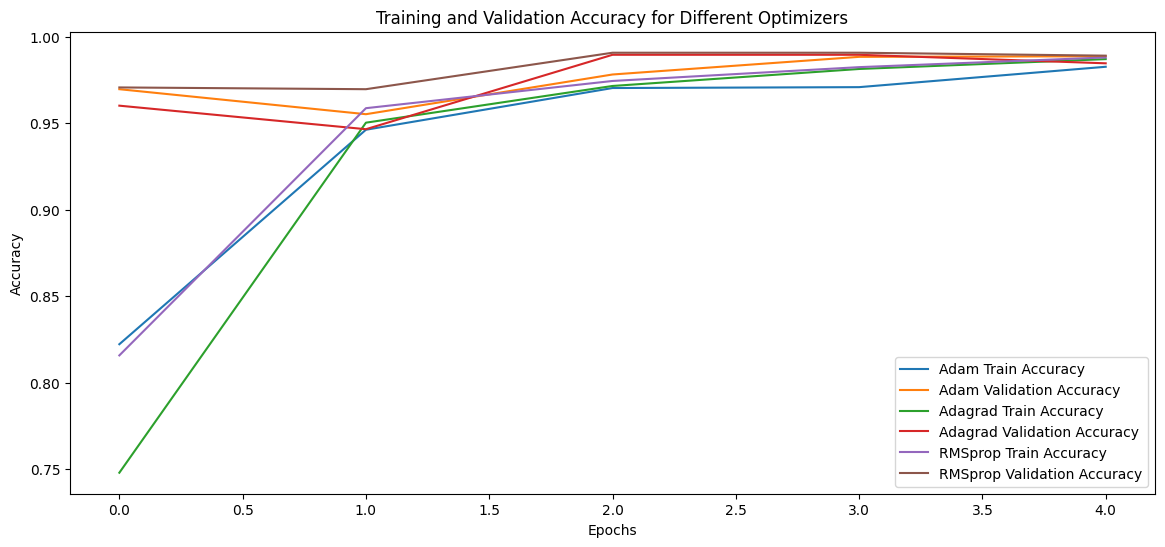

In [22]:
# Plotting the training and validation accuracy
plt.figure(figsize=(14, 6))
for name, history in part3_histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Training and Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


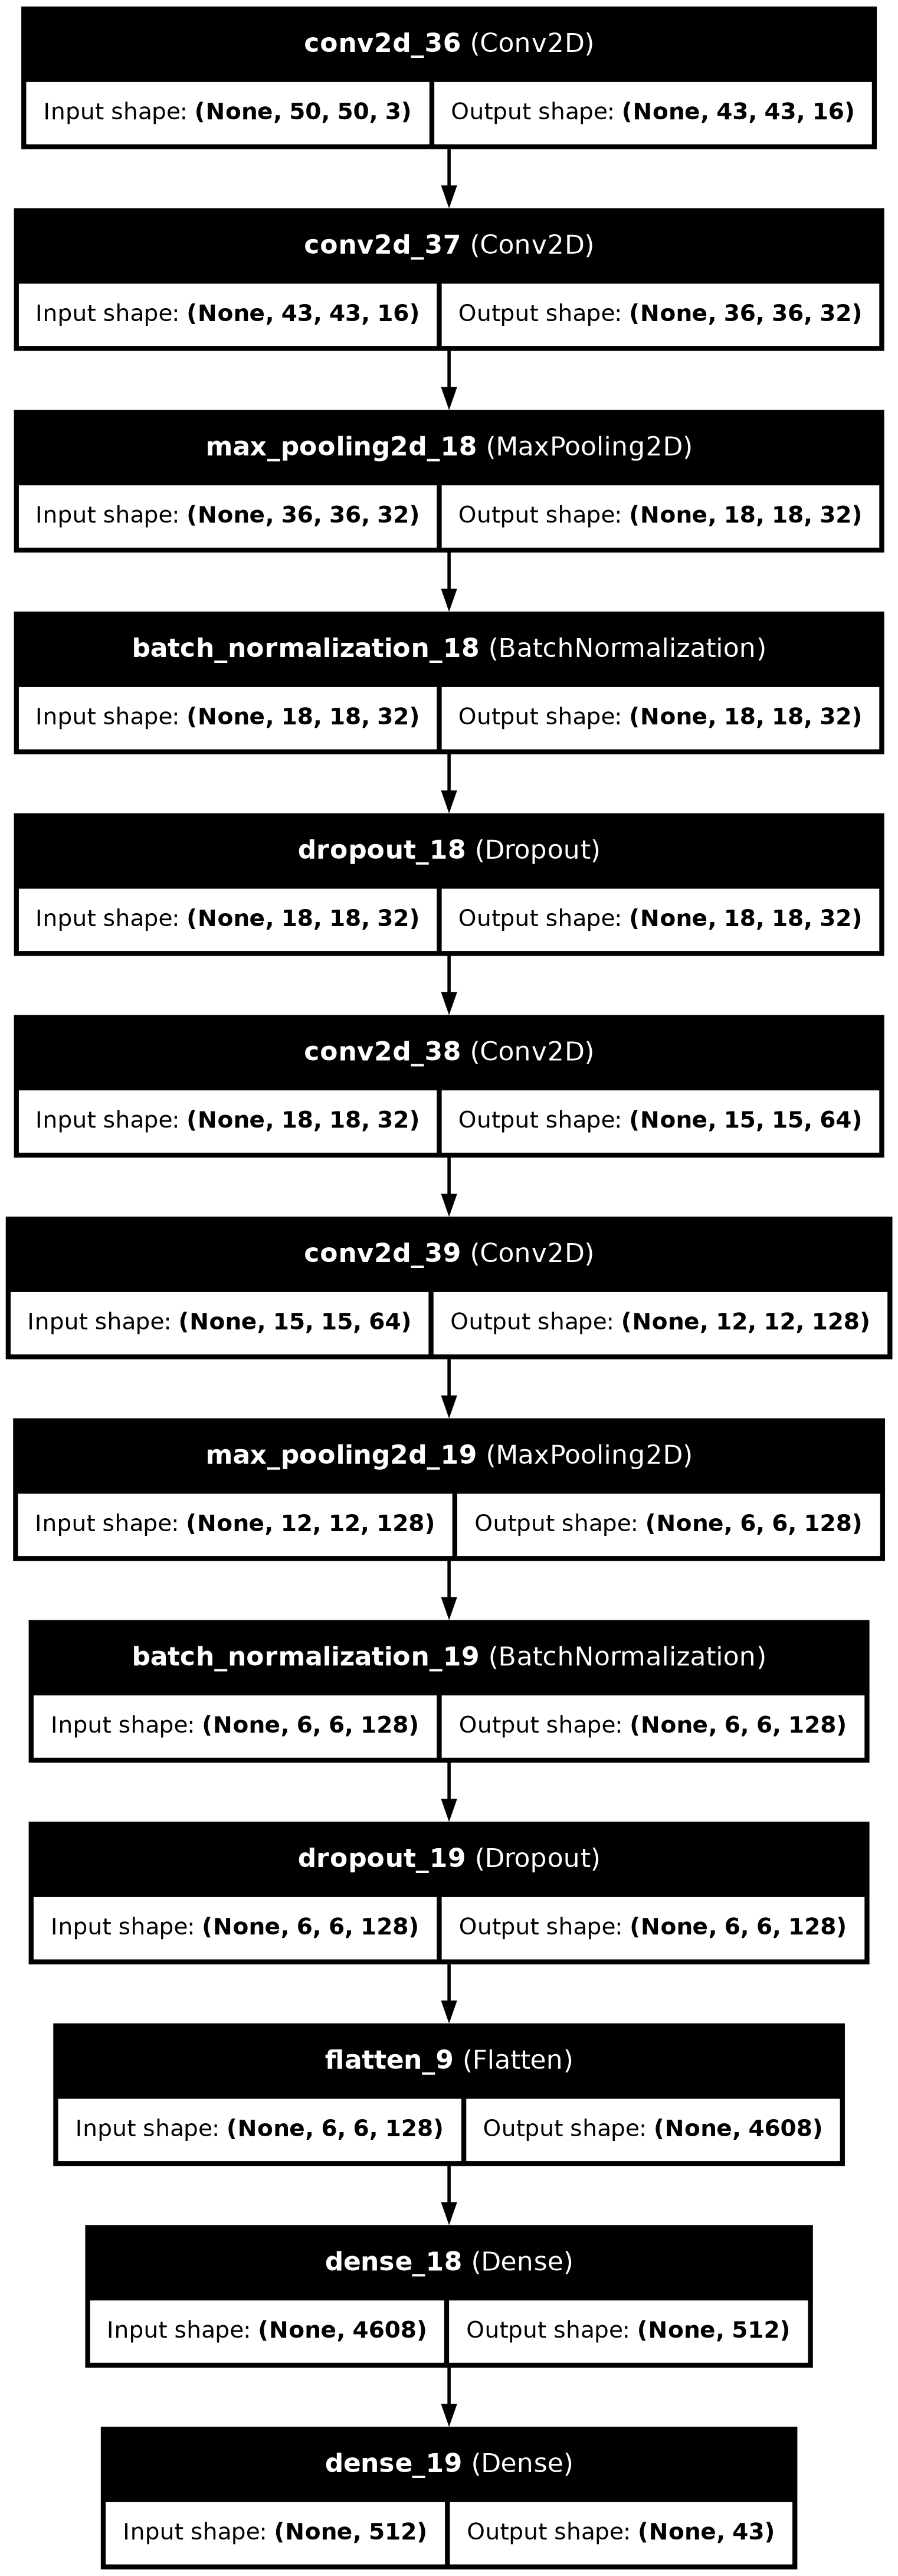

In [23]:
# Install necessary packages
!pip install pydot
!pip install graphviz
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
# Display the saved image
Image(filename='model_architecture.png')